In [1]:
#Import Numpy and Pandas

import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets 
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import random
import math
import operator
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

F:\Python\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
F:\Python\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [9]:
#import file

df = pd.read_csv("C:\\Users\\Raghavendra Reddy\\Documents\\bank-additional-full.csv",delimiter=';',encoding='cp1252')

In [10]:
#Explore data

df.shape
type(df)
df.size
df.head()
df.tail()

(41188, 21)

pandas.core.frame.DataFrame

864948

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [11]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
#y Category Calculation

pd.crosstab(index=df["y"], columns = "Category")

col_0,Category
y,
no,36548
yes,4640


In [59]:
#import pandas profiling package
import pandas_profiling
import seaborn as sns
eda_report = pandas_profiling.ProfileReport(df)
eda_report

Number of variables,21
Number of observations,41188
Total Missing (%),0.0%
Total size in memory,6.6 MiB
Average record size in memory,168.0 B
Numeric,8
Categorical,10
Boolean,1
Date,0
Text (Unique),0
Rejected,2


In [61]:
df=df.drop(['euribor3m', 'nr.employed'], axis=1)

In [62]:
#Findout types of each variable

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
y                 41188 non-null int64
dtypes: float64(3), int64(6), object(10)
memory usage: 6.0+ MB


In [63]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'y'],
      dtype='object')

In [64]:
#Segregate out independent categprical variables for conversion into numerical
x_catg = df.loc[:,('job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome')]
x_catg.head()
x_catg.shape

,job,marital,education,default,housing,loan,contact,month,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,nonexistent


(41188, 9)

In [65]:
#Separate Out independent numerical values
x_num = df.loc [:,('age', 'duration', 'campaign', 'pdays','previous')]
x_num.head()
x_num.shape

,age,duration,campaign,pdays,previous
0,56,261,1,999,0
1,57,149,1,999,0
2,37,226,1,999,0
3,40,151,1,999,0
4,56,307,1,999,0


(41188, 5)

In [66]:
#Convert Catagorical vars to dummy coding
x_num1 = pd.get_dummies(x_catg)
x_num1.head()
x_num1.shape

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


(41188, 48)

In [135]:
#Dividing data into features(Taking all X together) and labels

X = pd.concat([x_num1, x_num], axis=1)
y = df['y'].values
X.head()
y

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success,age,duration,campaign,pdays,previous
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,56,261,1,999,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,57,149,1,999,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,37,226,1,999,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,40,151,1,999,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,56,307,1,999,0


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [136]:
#Convert y value from (Yes, No) to (0,1)

from sklearn.preprocessing import LabelEncoder

le = preprocessing.LabelEncoder()
le.fit(df['y'])
list (le.classes_)
dfn = le.transform(df['y'])
le.inverse_transform([0,1])
df['y'] = dfn

LabelEncoder()

[0, 1]

F:\Python\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 1], dtype=int64)

In [137]:
#Create Dependent Variable

y1 = df['y']
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [138]:
#Create a Train & Test Data split with 70% & 30 %

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state = 1)
X_train.shape
X_test.shape
y_train.shape
y_test.shape
type(X_train)

(28831, 53)

(12357, 53)

(28831,)

(12357,)

pandas.core.frame.DataFrame

In [139]:
#Building a logistic regression model - First hand

from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)
log.coef_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

array([[-0.04927907, -0.41381261, -0.21719544, -0.1019656 , -0.19187276,
         0.5665964 , -0.16106505, -0.33246311,  0.58122757, -0.2303683 ,
         0.08604283,  0.06099272, -0.26586221, -0.18132598,  0.04989009,
        -0.0058643 , -0.19066219, -0.1163162 , -0.14483896, -0.15468338,
         0.01205134, -0.02578117,  0.02728745,  0.18978071,  0.11006303,
        -0.51122995, -0.00199548, -0.14272015, -0.09099597, -0.16944629,
        -0.14782126, -0.09099597, -0.16434517,  0.32785048, -0.73101288,
        -0.06965705, -0.67670515,  0.2963957 , -0.95282638,  0.15439159,
         1.25264653, -0.82298165, -0.92786737,  0.74407194,  0.59936945,
        -0.17448494, -0.15971065, -0.06896681,  0.00792719,  0.00426937,
        -0.08600663, -0.00227267,  0.0839422 ]])

Confusion Matrix


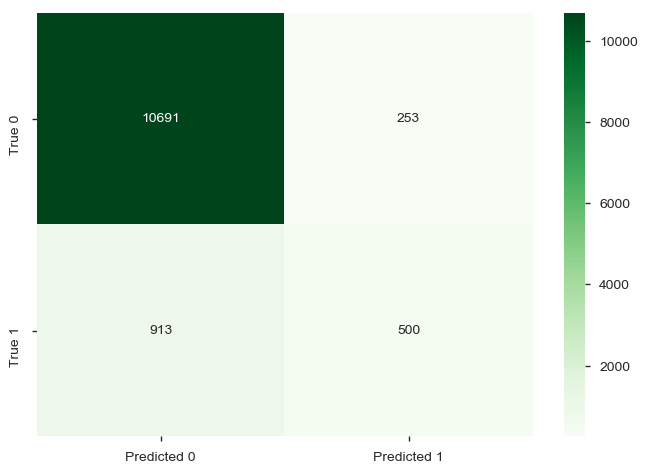

In [140]:
#Confusion Matrix

print ('Confusion Matrix')
cf = metrics.confusion_matrix(y_test,classes)
lbl1 = ["Predicted 0", "Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot = True, cmap = "Greens", fmt = "d", xticklabels = lbl1, yticklabels = lbl2)
plt.show();

# Sampling: Train & Test

Class 0: 36548
Class 1: 4640
Proportion: 0.13 : -1


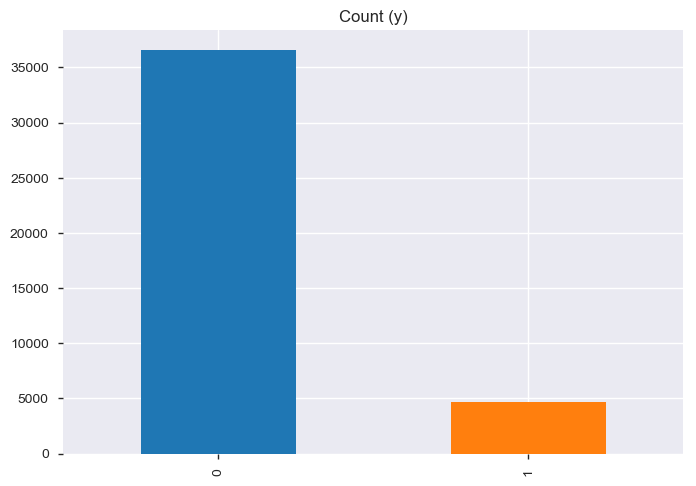

In [122]:
#Imbalanced dataset: One of the major issues that novice users fall into when dealing with unbalanced datasets relates to the metrics used to evaluate their model.
y_count = df.y.value_counts()
print('Class 0:', y_count[0])
print('Class 1:', y_count[1])
print('Proportion:', round(y_count[1] / y_count[0], 2), ': -1')

y_count.plot(kind='bar', title='Count (y)');

In [123]:
# Class count
count_class_0, count_class_1 = df.y.value_counts()

# Divide by class
df_class_0 = df[df['y'] == 0]
df_class_1 = df[df['y'] == 1]

Random under-sampling:
1    4640
0    4640
Name: y, dtype: int64


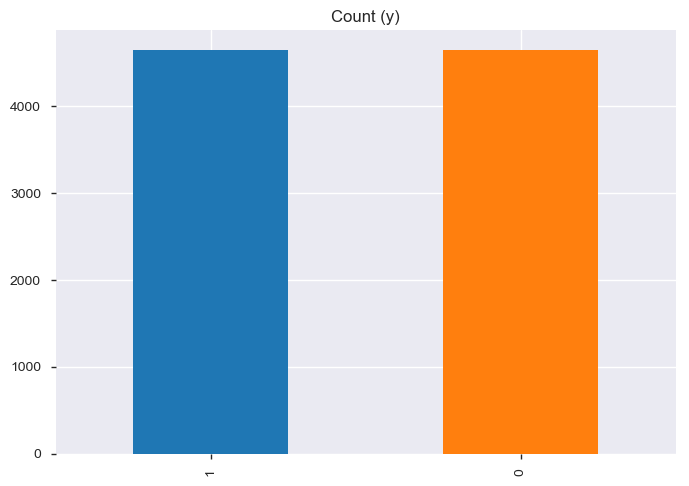

In [124]:
#Random under sampling
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.y.value_counts())

df_test_under.y.value_counts().plot(kind='bar', title='Count (y)');

Random over-sampling:
1    36548
0    36548
Name: y, dtype: int64


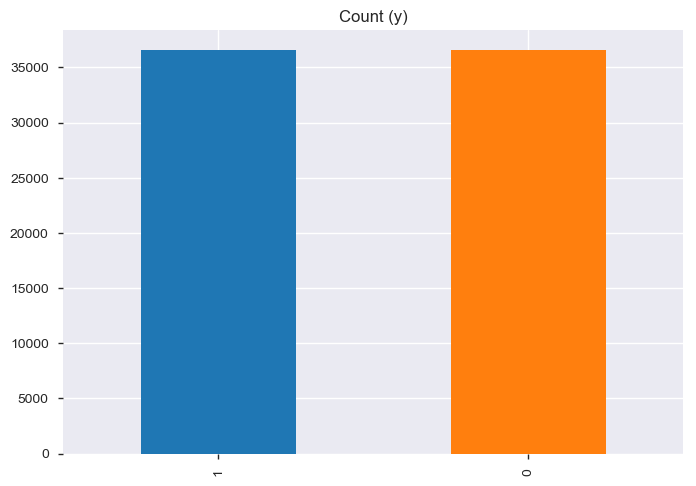

In [125]:
#WE will do Random oversampling
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.y.value_counts())

df_test_over.y.value_counts().plot(kind='bar', title='Count (y)');

### Under sampling model

In [166]:
#Segregate out independent categprical variables for conversion into numerical

x_catg = df_test_under.loc[:,('job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month', 'poutcome')]
x_catg.head()
x_catg.shape

,job,marital,education,default,housing,loan,contact,month,poutcome
25242,technician,married,professional.course,no,yes,no,cellular,nov,failure
28857,management,married,basic.4y,unknown,no,no,cellular,apr,nonexistent
6105,admin.,single,university.degree,no,yes,no,telephone,may,nonexistent
21785,technician,married,professional.course,no,yes,no,cellular,aug,nonexistent
11755,technician,married,university.degree,no,yes,no,telephone,jun,nonexistent


(9280, 9)

In [167]:
#Separate Out independent numerical values

x_num_under = df_test_under.loc [:,('age', 'duration', 'campaign', 'pdays',
       'previous')]
x_num_under.head()
x_num_under.shape

,age,duration,campaign,pdays,previous
25242,46,163,2,999,1
28857,55,594,2,999,0
6105,31,659,4,999,0
21785,37,72,1,999,0
11755,53,73,3,999,0


(9280, 5)

In [168]:
#Convert Catagorical vars to dummy coding
x_num1_under = pd.get_dummies(x_catg)


In [169]:
#Dividing data into features(Taking all X together) and labels

X = pd.concat([x_num1_under, x_num_under], axis=1)
y = df_test_under['y'].values
X.head()
y

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success,age,duration,campaign,pdays,previous
25242,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,46,163,2,999,1
28857,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,55,594,2,999,0
6105,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,31,659,4,999,0
21785,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,37,72,1,999,0
11755,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,53,73,3,999,0


array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [170]:
#Create Dependent Variable

y = df_test_under['y']
y.head()

25242    0
28857    0
6105     0
21785    0
11755    0
Name: y, dtype: int64

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state = 1)
X_train.shape
X_test.shape
y_train.shape
y_test.shape
type(X_train)


(6496, 52)

(2784, 52)

(6496,)

(2784,)

pandas.core.frame.DataFrame

# Logistic Regression Model:

In [172]:
#Building a logistic regression model

from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)
log.coef_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

array([[-1.14009313e-01, -3.86418273e-01, -7.43679324e-01,
         3.60701356e-03, -2.47665105e-01,  7.43542444e-01,
        -3.05061275e-01, -1.23389146e-01,  1.01351279e+00,
        -4.53267847e-01,  3.90631655e-01,  2.09916370e-01,
        -7.63708487e-02, -3.87196027e-02,  1.50793330e-01,
        -4.79828860e-02, -1.53836965e-01,  1.25439906e-01,
        -2.92631147e-01, -2.61405364e-01,  1.19360726e-01,
         6.06488631e-02,  1.15132956e-01,  2.75011017e-01,
         3.60757878e-01, -3.73037886e-01, -7.21621504e-02,
         6.47712234e-02, -4.88908060e-03,  3.39017833e-03,
         6.47712234e-02, -8.04414093e-02,  5.65340010e-01,
        -5.77620017e-01,  1.74636914e-01, -9.99110933e-01,
         5.20405947e-01, -1.17755409e+00, -1.80941869e-01,
         1.64198106e+00, -1.11913290e+00, -1.06516689e+00,
         1.18883482e+00,  1.00376794e+00, -1.52076914e-01,
        -1.34571675e-03,  1.41142624e-01,  6.05149475e-03,
         5.48424954e-03, -7.64801930e-02, -1.91944137e-0

In [173]:
#Generate Model Diagnostics

classes = log.predict(X_test)
print ('Positive cases in Test Data:', y_test[y_test == 1].shape[0])
print ('Negative cases in Test Data:', y_test[y_test == 0].shape[0])

Positive cases in Test Data: 1391
Negative cases in Test Data: 1393


Confusion Matrix


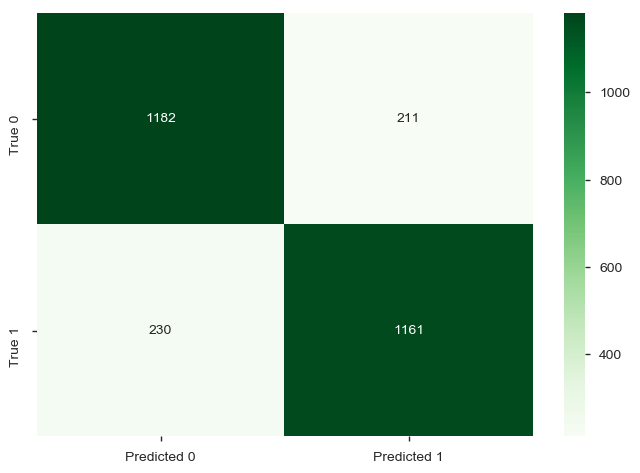

In [174]:
#Confusion Matrix

print ('Confusion Matrix')
cf = metrics.confusion_matrix(y_test,classes)
lbl1 = ["Predicted 0", "Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot = True, cmap = "Greens", fmt = "d", xticklabels = lbl1, yticklabels = lbl2)
plt.show();

In [175]:
#Precision & Recall

#print ('Accuracy Score')
#print (metrics.accuracy_score(y_test, classes))
print ('Precision/Recall Metrics')
print(metrics.classification_report(y_test, classes))
#print ('AUC')
auc = metrics.roc_auc_score(y_test,classes)*100
print('\n*****The overall ACCURACY Percentage of the model is: ' + str(round(auc, 2)) + ' %')

Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.84      0.85      0.84      1393
          1       0.85      0.83      0.84      1391

avg / total       0.84      0.84      0.84      2784


*****The overall ACCURACY Percentage of the model is: 84.16 %


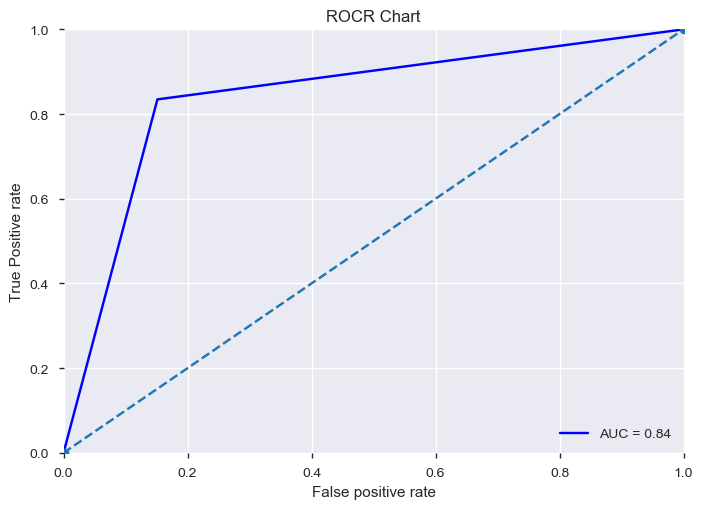

In [176]:
#ROC Chart

fpr, tpr, th = roc_curve(y_test, classes)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROCR Chart')
plt.plot(fpr,tpr,'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive rate')
plt.xlabel('False positive rate')
plt.show();

# KNN Model:

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

MODEL PREDICTED CLASS VALUE =1


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

MODEL PREDICTED CLASS VALUE =1


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

MODEL PREDICTED CLASS VALUE =1


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

MODEL PREDICTED CLASS VALUE =0

*****The overall ACCURACY Percentage of the model is: 77.77 %


Text(0.5,0,'Value for K for KNN')

Text(0,0.5,'Testing Accuracy')

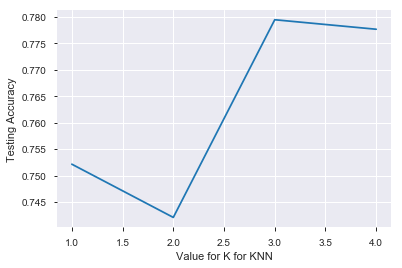

In [177]:
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import math
%matplotlib inline

 
predictions = []

# creating list of K for KNN

k_range = list(range(1,5))

for k in k_range:
    
    neighbors = KNeighborsClassifier(n_neighbors=k)  # Instantiate learning model
    neighbors.fit(X_train, y_train)                  # Fitting the model
    result = neighbors.predict(X_test)               # Predicting the Test set results
    predictions.append(metrics.accuracy_score(y_test, result))
    print('MODEL PREDICTED CLASS VALUE =' + repr(result[k]))
    #print('ACTUAL CLASS VALUE =' + str(round(p[k])))   #Error coming in this line
   
    
# summarize performance of the classification

accuracy = accuracy_score(y_test, result)*100
print('\n*****The overall ACCURACY Percentage of the model is: ' + str(round(accuracy, 2)) + ' %')

#print ('\nThe overall accuracy of the model is: ' + repr(accuracy_score(y_test[k], predictions)) + "\n")
#report = classification_report(y_test, predictions, target_names = df.y)
#print ('A detailed classification report: \n\n' + report)
    
plt.xlabel('Value for K for KNN')
plt.ylabel('Testing Accuracy')
plt.plot(k_range, predictions)

# SVM Model:

In [178]:
from sklearn.svm import SVC


svm= SVC()

#Using SVM classifier 

svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [179]:
# **Now get predictions from the model and create a confusion matrix and a classification report.**

pred=svm.predict(X_test)

In [180]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.81      0.80      0.80      1393
          1       0.80      0.81      0.81      1391

avg / total       0.81      0.81      0.81      2784



In [181]:
# get the accuracy

svm_accuracy = accuracy_score(y_test, pred)*100

#print (svm_accuracy)

print('Accuracy of SVM model is: ' + str(round(svm_accuracy, 2)) + ' %')

Accuracy of SVM model is: 80.57 %


# Random Forest Model:

In [182]:
## Building the model

rfc = RandomForestClassifier(n_estimators=600)

In [183]:
## Training the classifier

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [184]:
## Predicting the Class

predictions = rfc.predict(X_test)

In [185]:
## Checking the classification_report

rep = classification_report(y_test,predictions)
print (rep)

             precision    recall  f1-score   support

          0       0.89      0.81      0.85      1393
          1       0.83      0.89      0.86      1391

avg / total       0.86      0.85      0.85      2784



In [186]:
# get the accuracy

rf_accuracy = accuracy_score(y_test, pred)*100

#print (rf_accuracy)

print('Accuracy of RF model is: ' + str(round(rf_accuracy, 2)) + ' %')

Accuracy of RF model is: 80.57 %


# Neural Network (NN) Model:

In [187]:
# Neural Network - Multi-layer Perceptron (MLP)

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score                        

MLPC = MLPClassifier(random_state=2)

MLPC.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [188]:
#Calculate Accuracy

scores = cross_val_score(MLPC,X_test,y_test,cv=5,scoring='accuracy')*100

print("Accuracy of NN model is: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy of NN model is: 80.92 (+/- 4.67)


##Over sampling model

In [189]:
#Segregate out independent categprical variables for conversion into numerical

x_catg = df_test_over.loc[:,('job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month', 'poutcome')]
x_catg.head()
x_catg.shape

,job,marital,education,default,housing,loan,contact,month,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,nonexistent


(73096, 9)

In [191]:
#Separate Out independent numerical values

x_num_over = df_test_over.loc [:,('age', 'duration', 'campaign', 'pdays',
       'previous')]
x_num_over.head()
x_num_over.shape

,age,duration,campaign,pdays,previous
0,56,261,1,999,0
1,57,149,1,999,0
2,37,226,1,999,0
3,40,151,1,999,0
4,56,307,1,999,0


(73096, 5)

In [192]:
#Convert Catagorical vars to dummy coding
x_num1_over = pd.get_dummies(x_catg)


In [194]:
#Dividing data into features(Taking all X together) and labels

X = pd.concat([x_num1_over, x_num_over], axis=1)
y = df_test_over['y'].values
X.head()
y

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success,age,duration,campaign,pdays,previous
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,56,261,1,999,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,57,149,1,999,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,37,226,1,999,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,40,151,1,999,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,56,307,1,999,0


array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [195]:
#Create Dependent Variable

y = df_test_over['y']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state = 1)
X_train.shape
X_test.shape
y_train.shape
y_test.shape
type(X_train)


(51167, 53)

(21929, 53)

(51167,)

(21929,)

pandas.core.frame.DataFrame

In [197]:
#Building a logistic regression model

from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)
log.coef_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

array([[-0.01510418, -0.50321621, -0.38387483, -0.05127046, -0.26642324,
         0.7381417 , -0.28567146, -0.30967655,  0.96839986, -0.32009955,
         0.26994667,  0.09874719, -0.13652236, -0.06693567,  0.14879952,
        -0.00544256, -0.04420721, -0.0656347 , -0.18633175, -0.13882848,
         0.0318732 ,  0.04054296,  0.14306565,  0.15941926,  0.42134841,
        -0.47735012, -0.00409936, -0.06987307,  0.02099174, -0.01121974,
         0.03327709,  0.02099174, -0.1143699 ,  0.52349758, -0.58359866,
         0.02881929, -0.89796248,  0.49995904, -1.16789848, -0.08634987,
         1.71122971, -1.25629012, -0.95037466,  1.28096195,  0.77780455,
        -0.1213421 , -0.10270948,  0.16395052,  0.00790132,  0.00621789,
        -0.07354744, -0.00215336,  0.19153415]])

In [198]:
#Generate Model Diagnostics

classes = log.predict(X_test)
print ('Positive cases in Test Data:', y_test[y_test == 1].shape[0])
print ('Negative cases in Test Data:', y_test[y_test == 0].shape[0])

Positive cases in Test Data: 10927
Negative cases in Test Data: 11002


Confusion Matrix


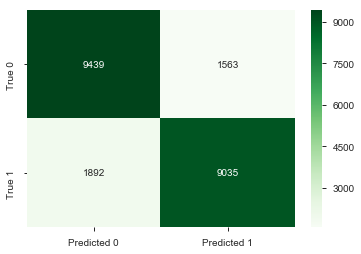

In [199]:
#Confusion Matrix

print ('Confusion Matrix')
cf = metrics.confusion_matrix(y_test,classes)
lbl1 = ["Predicted 0", "Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot = True, cmap = "Greens", fmt = "d", xticklabels = lbl1, yticklabels = lbl2)
plt.show();

In [200]:
#Precision & Recall

#print ('Accuracy Score')
#print (metrics.accuracy_score(y_test, classes))
print ('Precision/Recall Metrics')
print(metrics.classification_report(y_test, classes))
#print ('AUC')
auc = metrics.roc_auc_score(y_test,classes)*100
print('\n*****The overall ACCURACY Percentage of the model is: ' + str(round(auc, 2)) + ' %')

Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.83      0.86      0.85     11002
          1       0.85      0.83      0.84     10927

avg / total       0.84      0.84      0.84     21929


*****The overall ACCURACY Percentage of the model is: 84.24 %


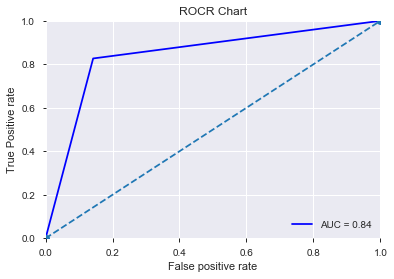

In [201]:
#ROC Chart

fpr, tpr, th = roc_curve(y_test, classes)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROCR Chart')
plt.plot(fpr,tpr,'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive rate')
plt.xlabel('False positive rate')
plt.show();

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

MODEL PREDICTED CLASS VALUE =0


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

MODEL PREDICTED CLASS VALUE =1


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

MODEL PREDICTED CLASS VALUE =1


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

MODEL PREDICTED CLASS VALUE =0

*****The overall ACCURACY Percentage of the model is: 91.11 %


Text(0.5,0,'Value for K for KNN')

Text(0,0.5,'Testing Accuracy')

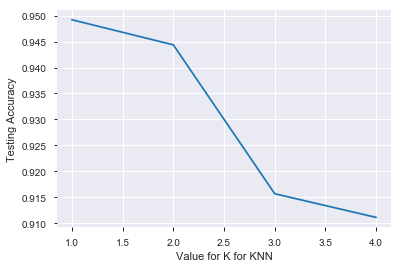

In [202]:
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import math
%matplotlib inline

 
predictions = []

# creating list of K for KNN

k_range = list(range(1,5))

for k in k_range:
    
    neighbors = KNeighborsClassifier(n_neighbors=k)  # Instantiate learning model
    neighbors.fit(X_train, y_train)                  # Fitting the model
    result = neighbors.predict(X_test)               # Predicting the Test set results
    predictions.append(metrics.accuracy_score(y_test, result))
    print('MODEL PREDICTED CLASS VALUE =' + repr(result[k]))
    #print('ACTUAL CLASS VALUE =' + str(round(p[k])))   #Error coming in this line
   
    
# summarize performance of the classification

accuracy = accuracy_score(y_test, result)*100
print('\n*****The overall ACCURACY Percentage of the model is: ' + str(round(accuracy, 2)) + ' %')

#print ('\nThe overall accuracy of the model is: ' + repr(accuracy_score(y_test[k], predictions)) + "\n")
#report = classification_report(y_test, predictions, target_names = df.y)
#print ('A detailed classification report: \n\n' + report)
    
plt.xlabel('Value for K for KNN')
plt.ylabel('Testing Accuracy')
plt.plot(k_range, predictions)

In [203]:
#SVM MODEL
from sklearn.svm import SVC


svm= SVC()

#Using SVM classifier 

svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [204]:
# **Now get predictions from the model and create a confusion matrix and a classification report.**

pred=svm.predict(X_test)

In [205]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.91      0.86      0.88     11002
          1       0.86      0.92      0.89     10927

avg / total       0.89      0.89      0.89     21929



In [206]:
# get the accuracy

svm_accuracy = accuracy_score(y_test, pred)*100

#print (svm_accuracy)

print('Accuracy of SVM model is: ' + str(round(svm_accuracy, 2)) + ' %')

Accuracy of SVM model is: 88.55 %


In [207]:
## Building the model - RANDOM FOREST

rfc = RandomForestClassifier(n_estimators=600)

In [208]:
## Training the classifier

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [209]:
## Predicting the Class

predictions = rfc.predict(X_test)

In [210]:
## Checking the classification_report

rep = classification_report(y_test,predictions)
print (rep)

             precision    recall  f1-score   support

          0       1.00      0.93      0.96     11002
          1       0.93      1.00      0.96     10927

avg / total       0.97      0.96      0.96     21929



In [211]:
# get the accuracy

rf_accuracy = accuracy_score(y_test, pred)*100

#print (rf_accuracy)

print('Accuracy of RF model is: ' + str(round(rf_accuracy, 2)) + ' %')

Accuracy of RF model is: 88.55 %


In [212]:
# Neural Network - Multi-layer Perceptron (MLP)

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score                        

MLPC = MLPClassifier(random_state=2)

MLPC.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [213]:
#Calculate Accuracy

scores = cross_val_score(MLPC,X_test,y_test,cv=5,scoring='accuracy')*100

print("Accuracy of NN model is: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy of NN model is: 81.78 (+/- 5.50)
